## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

import lightgbm as lgb
from lightgbm import LGBMClassifier

## Read the Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


In [4]:
test.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F
4,patient_id_789,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,F


In [5]:
sample_submission.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [6]:
train.shape, test.shape

((3088, 12), (1324, 11))

## Exploratory Data Analysis

In [7]:
train.isnull().sum()

patient_id_     0
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [8]:
test.isnull().sum()

patient_id_     0
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
dtype: int64

In [9]:
#To check for the target column

target = [col for col in train.columns if col not in test.columns]

target

['SOURCE']

In [10]:
#To check for information on the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id_   3088 non-null   object 
 1   HAEMATOCRIT   3088 non-null   float64
 2   HAEMOGLOBINS  3088 non-null   float64
 3   ERYTHROCYTE   3088 non-null   float64
 4   LEUCOCYTE     3088 non-null   float64
 5   THROMBOCYTE   3088 non-null   int64  
 6   MCH           3088 non-null   float64
 7   MCHC          3088 non-null   float64
 8   MCV           3088 non-null   float64
 9   AGE           3088 non-null   int64  
 10  SEX           3088 non-null   object 
 11  SOURCE        3088 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 289.6+ KB


In [11]:
# To have stastistical information of the train dataset

train.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,38.381865,12.638472,4.752160,8.788504,260.652850,28.218264,33.352364,84.540026,46.617876,0.409974
std,6.070420,2.104983,0.792281,5.055580,115.504157,2.658656,1.227691,6.814936,21.684646,0.491908
min,13.900000,4.300000,1.690000,1.200000,13.000000,14.900000,26.400000,54.000000,1.000000,0.000000
25%,34.500000,11.275000,4.240000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.800000,12.800000,4.790000,7.600000,259.000000,28.700000,33.400000,85.400000,47.000000,0.000000
75%,42.700000,14.200000,5.260000,10.400000,325.000000,29.800000,34.100000,88.700000,64.000000,1.000000
max,69.200000,18.100000,8.070000,76.700000,1188.000000,36.800000,39.000000,105.300000,99.000000,1.000000


In [12]:
test.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000
mean,38.434592,12.649320,4.749162,8.888822,266.889728,28.273036,33.321299,84.783006,46.646526
std,5.747626,2.020961,0.764941,5.034963,110.236480,2.705596,1.231122,6.960646,21.847658
min,14.800000,3.700000,2.190000,1.200000,15.000000,16.500000,26.000000,54.100000,1.000000
25%,34.800000,11.400000,4.290000,5.900000,200.000000,27.100000,32.600000,81.600000,29.000000
50%,38.850000,12.800000,4.770000,7.700000,267.000000,28.700000,33.400000,85.400000,48.000000
75%,42.700000,14.025000,5.270000,10.600000,327.000000,29.900000,34.100000,88.800000,64.000000
max,58.300000,18.800000,7.170000,60.900000,979.000000,40.800000,37.600000,115.600000,98.000000


In [13]:
# Grouping the data into Categorical and numerical features

categorical_feat = [feat for feat in train.columns if train[feat].dtype == 'O']

categorical_feat

['patient_id_', 'SEX']

In [14]:
num_feat = [feat for feat in train.columns if feat not in categorical_feat]

num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SOURCE']

In [15]:
# To check the numerical features dataframe

train[num_feat].head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,0
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,0
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,1


In [16]:
# We need to remove the target variable(Source) column from the numerical features dataframe

num_feat.remove('SOURCE')

In [17]:
train[num_feat].head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66


In [18]:
Encoder = LabelEncoder()

In [19]:
train.SEX = Encoder.fit_transform(train.SEX)

In [20]:
test.SEX = Encoder.transform(test.SEX)

In [21]:
num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE']

In [22]:
num_feat.append("SEX")

In [23]:
categorical_feat.remove('SEX')

In [24]:
train[num_feat].head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,1
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,1
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,0


## Model Building

In [25]:
# Data Preprocessing

scaler = StandardScaler()
cols = num_feat

X = scaler.fit_transform(train[num_feat])
testing = scaler.transform(test[num_feat])

In [26]:
X = pd.DataFrame(data=X, columns=cols)
testing = pd.DataFrame(data=testing, columns=cols)

In [27]:
X.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,0.859740,0.884487,0.969308,-1.145159,-0.204812,-0.270204,0.201741,-0.416803,-0.674221,-1.048452
1,0.975071,0.836973,0.426484,-0.294476,-0.048949,0.557415,-0.368527,0.860011,-0.305237,0.953787
2,-0.359484,-0.065793,-0.229956,-0.195559,0.020324,0.256463,1.342278,-0.284719,0.847840,-1.048452
3,1.271639,0.979515,0.792575,-0.057076,0.513893,0.143605,-0.938796,0.625195,0.248240,0.953787
4,-1.084428,-0.826018,-0.886395,3.583056,-0.352017,0.143605,1.179345,-0.328747,0.893963,-1.048452


In [28]:
#Building a base model

X_train, X_test, y_train, y_test = train_test_split(X, train.SOURCE, test_size=0.2, random_state=42)

In [29]:
model = lgb.LGBMClassifier(objective='binary')

In [30]:
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Evaluation

In [31]:
from sklearn.metrics import f1_score

In [32]:
pred = model.predict(X_test)
pred2 = model.predict(X_train)

In [33]:
print('Training set')
print("classifier f1_score {}".format(f1_score(y_train, pred2)))
print('')
print('Testing set')
print("classifier f1_score {}".format(f1_score(y_test, pred)))

Training set
classifier f1_score 0.9497206703910616

Testing set
classifier f1_score 0.6313465783664458


In [34]:
sample_submission.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [35]:
submission_file = sample_submission.copy()

In [36]:
submission_file.SOURCE = model.predict(testing)

In [37]:
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0


<AxesSubplot:xlabel='SOURCE', ylabel='count'>

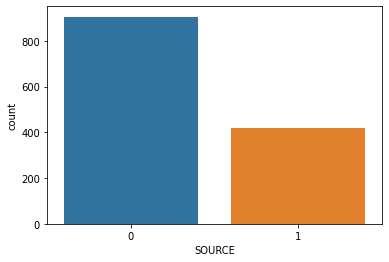

In [38]:
sns.countplot(x=submission_file.SOURCE)

In [39]:
#submission_file.to_csv("My_Third_Submission", index=False)